In [ ]:
from google.colab import files
files.upload()  # Select your kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikitavnaik","key":"23b487773ff1be29950d42f15e574f6f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d nirmalsankalana/plant-disease-test-dataset

# Unzip into a folder
!unzip -q plant-disease-test-dataset.zip -d /content/plant_dataset


Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/plant-disease-test-dataset
License(s): CC0-1.0
  0% 0.00/55.4M [00:00<?, ?B/s]
100% 55.4M/55.4M [00:00<00:00, 1.32GB/s]


In [ ]:
import os

data_path = '/content/plant_dataset/data'
for cls in os.listdir(data_path):
    cls_folder = os.path.join(data_path, cls)
    if os.path.isdir(cls_folder):
        print(cls, len(os.listdir(cls_folder)), "images")


Cherry___healthy 57 images
Tomato___leaf_curl 238 images
Bell_pepper___healthy 42 images
Corn___northern_leaf_blight 194 images
Soybean___healthy 65 images
Apple___leaf_blotch 111 images
Squash___powdery_mildew 130 images
Tomato___early_blight 88 images
Tomato___late_blight 111 images
Tomato___mosaic_virus 54 images
Rice___bacterial_blight 40 images
Grape___black_rot 79 images
Corn___gray_leaf_spot 67 images
Apple___rust 106 images
Corn___common_rust 117 images
Bell_pepper___bacterial_spot 83 images
Tomato___septoria_leaf_spot 157 images
Blueberry___healthy 117 images
Strawberry___healthy 96 images
Raspberry___healthy 119 images
Tomato___spider_mites 2 images
Tomato___bacterial_spot 110 images
Apple___healthy 134 images
Rice___leaf_smut 40 images
Potato___late_blight 208 images
Grape___healthy 75 images
Peach___healthy 112 images
Apple___scab 252 images
Potato___early_blight 171 images
Rice___brown_spot 40 images
Apple___rot 103 images
Tomato___healthy 52 images
Tomato___leaf_mold 91 i

In [ ]:
import tensorflow as tf

organized_path = '/content/plant_dataset/data'

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    organized_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224,224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    organized_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224,224),
    batch_size=32
)

# Check classes BEFORE caching
classes = train_ds.class_names
print("Classes:", classes)

# Now cache & prefetch for speed
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)


Found 3461 files belonging to 33 classes.
Using 2769 files for training.
Found 3461 files belonging to 33 classes.
Using 692 files for validation.
Classes: ['Apple___healthy', 'Apple___leaf_blotch', 'Apple___rot', 'Apple___rust', 'Apple___scab', 'Bell_pepper___bacterial_spot', 'Bell_pepper___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Corn___common_rust', 'Corn___gray_leaf_spot', 'Corn___northern_leaf_blight', 'Grape___black_rot', 'Grape___healthy', 'Peach___healthy', 'Potato___early_blight', 'Potato___late_blight', 'Raspberry___healthy', 'Rice___bacterial_blight', 'Rice___brown_spot', 'Rice___leaf_smut', 'Soybean___healthy', 'Squash___powdery_mildew', 'Strawberry___healthy', 'Tomato___bacterial_spot', 'Tomato___early_blight', 'Tomato___healthy', 'Tomato___late_blight', 'Tomato___leaf_curl', 'Tomato___leaf_mold', 'Tomato___mosaic_virus', 'Tomato___septoria_leaf_spot', 'Tomato___spider_mites']


Found 3461 files belonging to 33 classes.
Using 2769 files for training.
Found 3461 files belonging to 33 classes.
Using 692 files for validation.
Classes: ['Apple___healthy', 'Apple___leaf_blotch', 'Apple___rot', 'Apple___rust', 'Apple___scab', 'Bell_pepper___bacterial_spot', 'Bell_pepper___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Corn___common_rust', 'Corn___gray_leaf_spot', 'Corn___northern_leaf_blight', 'Grape___black_rot', 'Grape___healthy', 'Peach___healthy', 'Potato___early_blight', 'Potato___late_blight', 'Raspberry___healthy', 'Rice___bacterial_blight', 'Rice___brown_spot', 'Rice___leaf_smut', 'Soybean___healthy', 'Squash___powdery_mildew', 'Strawberry___healthy', 'Tomato___bacterial_spot', 'Tomato___early_blight', 'Tomato___healthy', 'Tomato___late_blight', 'Tomato___leaf_curl', 'Tomato___leaf_mold', 'Tomato___mosaic_virus', 'Tomato___septoria_leaf_spot', 'Tomato___spider_mites']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━

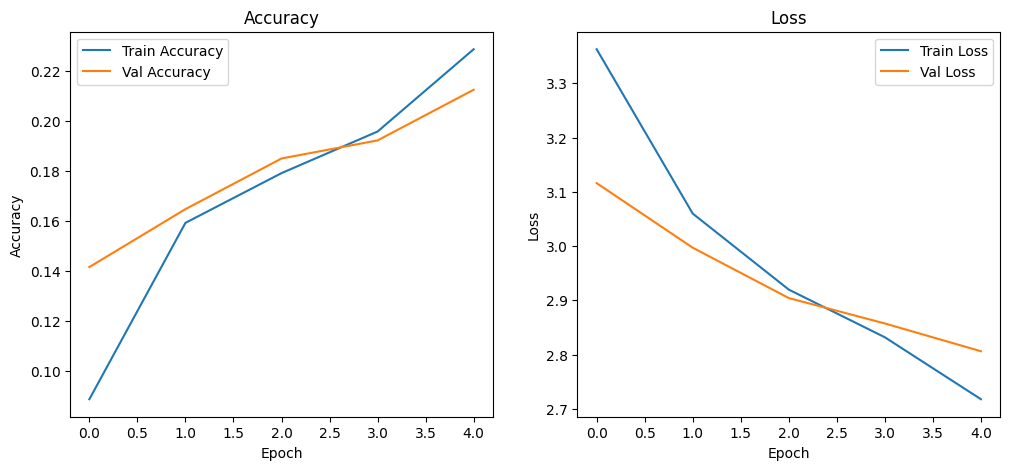

✅ Model saved!


In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
import cv2

#  Dataset Path
dataset_path = '/content/plant_dataset/data'  # dataset organized in class folders

# 3 Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(128,128),  # smaller size for faster training
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(128,128),
    batch_size=32
)

# Classes
classes = train_ds.class_names
print("Classes:", classes)

#  Optimize performance
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)

#  Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

#  Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(classes), activation='softmax')
])

#  Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#  Train model (fast demo)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,  # quick demo
    verbose=1
)

#  Plot training results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 🔟 Save model
model.save('plant_disease_model.keras')
print("✅ Model saved!")

# 1️⃣1️⃣ Prediction function
def predict_leaf(image_path, model, classes):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Image not found: {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128,128))
    img_array = np.expand_dims(img, axis=0)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    print("Predicted Class:", classes[class_idx])
    plt.imshow(img)
    plt.title(f"Prediction: {classes[class_idx]}")
    plt.axis('off')
    plt.show()


In [ ]:
import os

dataset_path = '/content/plant_dataset/data'  # Kaggle dataset folder
print(os.listdir(dataset_path))  # This should show the class folders

# List all files/folders in the main directory
!ls /content/plant_dataset

# If you see a 'data' folder or something else, list it too
!ls /content/plant_dataset/*



['Cherry___healthy', 'Tomato___leaf_curl', 'Bell_pepper___healthy', 'Corn___northern_leaf_blight', 'Soybean___healthy', 'Apple___leaf_blotch', 'Squash___powdery_mildew', 'Tomato___early_blight', 'Tomato___late_blight', 'Tomato___mosaic_virus', 'Rice___bacterial_blight', 'Grape___black_rot', 'Corn___gray_leaf_spot', 'Apple___rust', 'Corn___common_rust', 'Bell_pepper___bacterial_spot', 'Tomato___septoria_leaf_spot', 'Blueberry___healthy', 'Strawberry___healthy', 'Raspberry___healthy', 'Tomato___spider_mites', 'Tomato___bacterial_spot', 'Apple___healthy', 'Rice___leaf_smut', 'Potato___late_blight', 'Grape___healthy', 'Peach___healthy', 'Apple___scab', 'Potato___early_blight', 'Rice___brown_spot', 'Apple___rot', 'Tomato___healthy', 'Tomato___leaf_mold']
data  index.txt
/content/plant_dataset/index.txt

/content/plant_dataset/data:
Apple___healthy		      Raspberry___healthy
Apple___leaf_blotch	      Rice___bacterial_blight
Apple___rot		      Rice___brown_spot
Apple___rust		      Rice___leaf

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


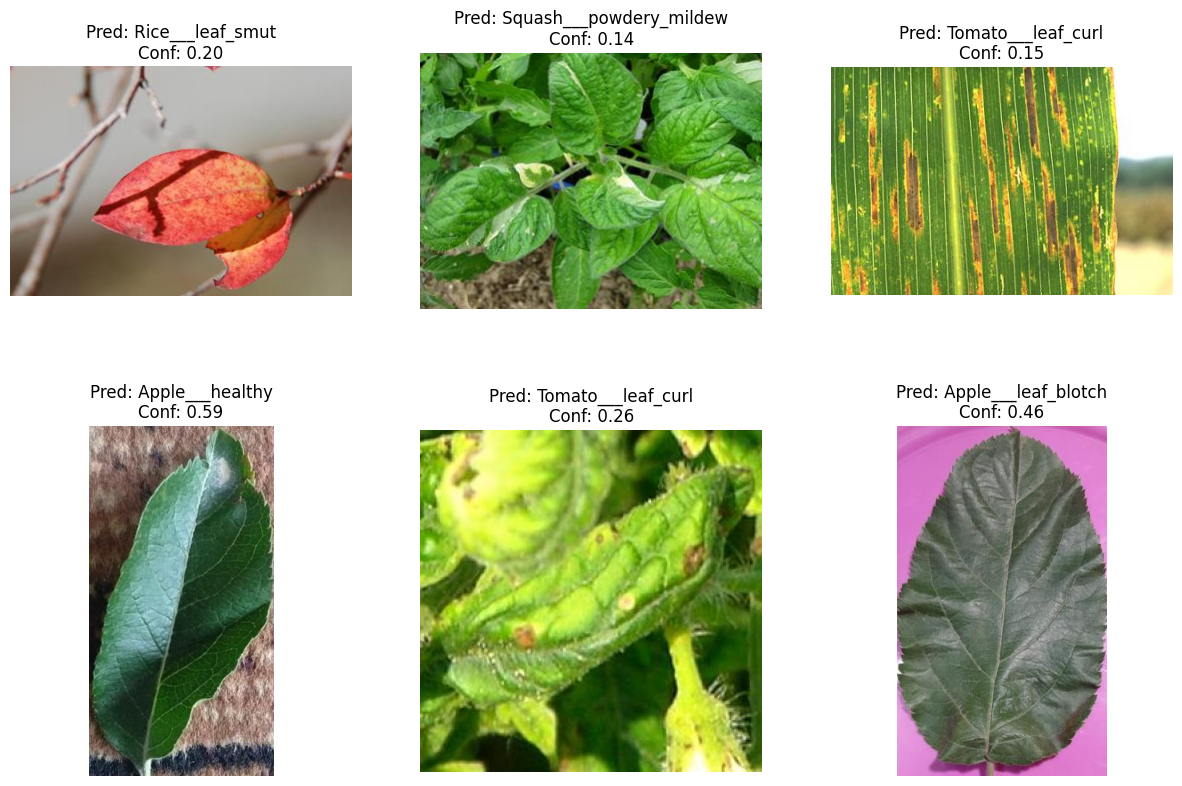

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

# Path to the dataset
data_path = '/content/plant_dataset/data'

# Load the trained model
model = tf.keras.models.load_model('/content/plant_disease_model.keras')

# Define the classes
classes = sorted(os.listdir(data_path))

# Function to predict the class of an image
def predict_leaf(image_path, model, classes):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Image not found: {image_path}")
        return None, None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img_array = np.expand_dims(img, axis=0)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = pred[0][class_idx]
    return classes[class_idx], confidence

# Collect all image paths
all_images = []
for cls in os.listdir(data_path):
    cls_folder = os.path.join(data_path, cls)
    if os.path.isdir(cls_folder):
        for img_file in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, img_file)
            all_images.append(img_path)

# Select 6 random images
sample_images = random.sample(all_images, min(6, len(all_images)))

# Plot predictions
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(sample_images, 1):
    pred_class, pred_conf = predict_leaf(img_path, model, classes)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {pred_class}\nConf: {pred_conf:.2f}")

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


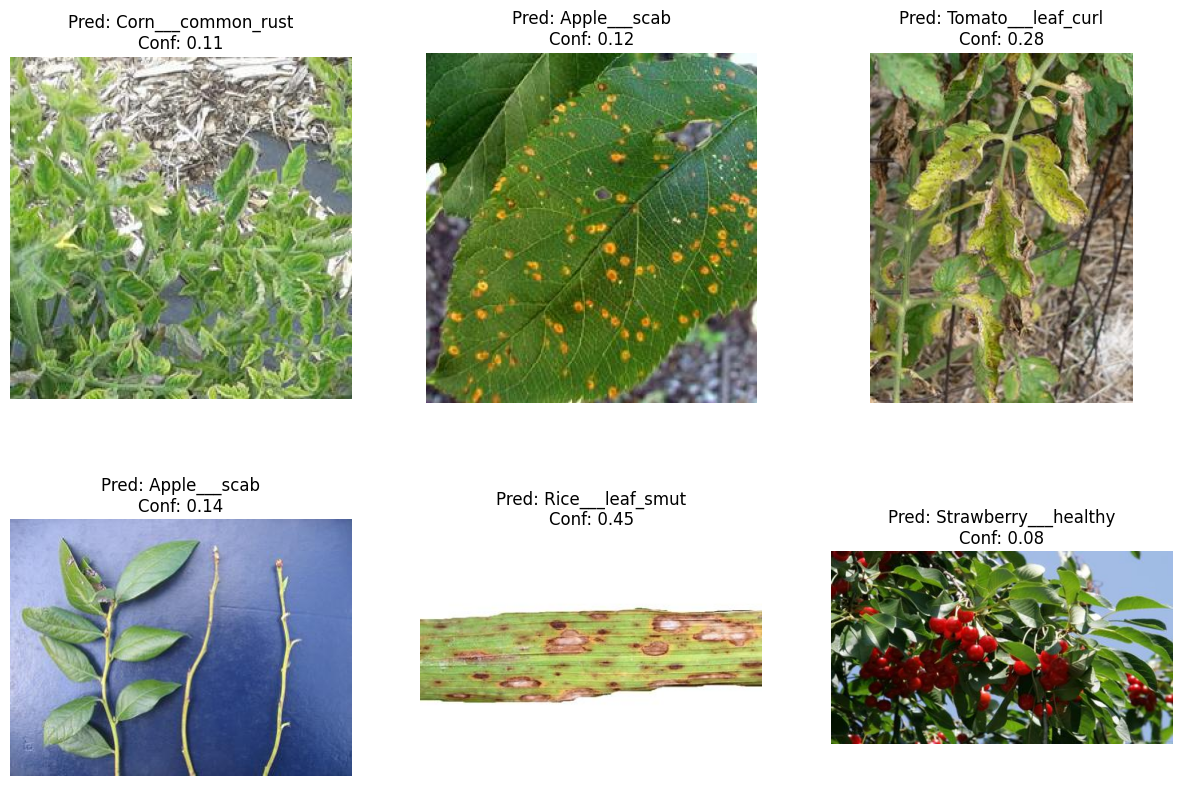

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

# Path to the dataset downloaded from Kaggle
data_path = '/content/plant_dataset/data'

# Load the trained model
model = tf.keras.models.load_model('/content/plant_disease_model.keras')

# Get all class names from the dataset folders
classes = sorted(os.listdir(data_path))

# Function to predict the class of a single leaf image
def predict_leaf(image_path, model, classes):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Image not found: {image_path}")
        return None, None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img_array = np.expand_dims(img, axis=0)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = pred[0][class_idx]
    return classes[class_idx], confidence

# Collect all image paths from all classes
all_images = []
for cls in os.listdir(data_path):
    cls_folder = os.path.join(data_path, cls)
    if os.path.isdir(cls_folder):
        for img_file in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, img_file)
            all_images.append(img_path)

# Pick 6 random images
sample_images = random.sample(all_images, min(6, len(all_images)))

# Predict & plot the 6 images
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(sample_images, 1):
    pred_class, pred_conf = predict_leaf(img_path, model, classes)
    if pred_class is None:
        continue
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {pred_class}\nConf: {pred_conf:.2f}")

plt.show()
